# Pandas

Pandas é uma biblioteca poderosa e fácil de usar pra fazer análise de dados. Basicamente, ela tem dois tipos principais de objetos pra representar dados: **Series** e **DataFrames**. 

In [0]:
import pandas as pd
import numpy as np

# Series 

**Series** se comportam como objetos do tipo array.

### pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [0]:
x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

Note que um *index* é gerado para cada item.

## Operações Básicas

In [0]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [0]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [0]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [0]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s1 + s2

a    11
b    22
c    33
d    44
dtype: int64

In [0]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
s1 + s2

a    31
b    12
c    43
d    24
dtype: int64

In [0]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64

In [0]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

### any() and all()

In [0]:
larger_than_2 = x > 2
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [0]:
larger_than_2.any()

True

In [0]:
larger_than_2.all()

False

### apply()

In [0]:
def f(x):
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

**Evite *for* explícitos sobre os seus dados**

Vamos comparar o tempo do *apply()* e de um *for loop*.

In [0]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

10 loops, best of 3: 165 ms per loop


In [0]:
%%timeit

ds = pd.Series(range(10000))
ds.apply(f)

100 loops, best of 3: 4.94 ms per loop


### astype()

In [0]:
x.astype(pd.np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

### copy()

In [0]:
y = x

In [0]:
y[0]

1

In [0]:
y[0] = 100

In [0]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [0]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

**Evite usar *copy* para economia de memória (se você puder)**

In [0]:
y = x.copy()
x[0] = 1
print(x,y, sep='\n')

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    100
1      2
2      3
3      4
4      5
dtype: int64


In [0]:
x.describe(percentiles=[0.25,0.5,0.75])

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

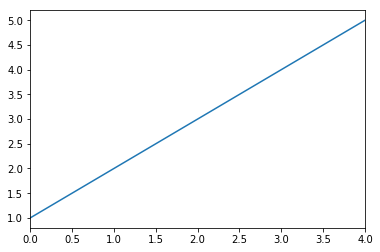

In [0]:
x.plot()

# DataFrame

**DataFrames** são considerados como tabelas de dados.

### pd.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)

In [0]:
data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data, columns=["x"])
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


### Selecionando dados

In [0]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [0]:
df["x"][0] # coluna x, linha 0

1

In [0]:
df.iloc[4, 0] # linha 4, coluna 0

5

In [0]:
df.loc[4, 'x'] # índice 4, coluna 'x'

5

### Adicionando colunas

In [0]:
df["x_plus_2"] = df["x"] + 2
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [0]:
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [0]:
df["is_even"] = df["x"] % 2 == 0
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,False
1,2,4,4,2,True
2,3,5,9,6,False
3,4,6,16,24,True
4,5,7,25,120,False
5,6,8,36,720,True
6,7,9,49,5040,False
7,8,10,64,40320,True
8,9,11,81,362880,False


### Operações

Algumas operações (como `mean`, `std`, `max`, `min`, etc) não podem ser usadas em todo o DataFrame. Ao invés disso, elas são aplicadas em relação as linhas ou colunas.

In [0]:
df.mean() # == df.mean(axis='index')

x                  5.000000
x_plus_2           7.000000
x_square          31.666667
x_factorial    45457.000000
is_even            0.444444
dtype: float64

In [0]:
df.mean(axis='columns') # a média será aplicada linha-a-linha (ao longo das colunas)

0        1.2
1        2.6
2        4.6
3       10.2
4       31.4
5      154.2
6     1021.0
7     8080.6
8    72596.2
dtype: float64

### apply()

A diferença entre o `apply` em **Series** e **DataFrames** é que, nos DataFrames, o `apply` é aplicado em cada coluna ao invés de todo o DataFrame. O resultado pode ser um simples scalar ou uma nova *Series*.

In [0]:
df = pd.DataFrame({
        'a': [1,2,3,4],
        'b': [5,6,7,8]
    })
df

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [0]:
def second_largest(df):
    def second_largest_by_column(values):
        return values.sort_values(ascending=False).iloc[1]
    return df.apply(second_largest_by_column)
print(second_largest(df))

a    3
b    7
dtype: int64


In [0]:
def standardize(df):
    def standardize_c(values):
        return (values - values.mean())/values.std(ddof=0)
    return df.apply(standardize_c)
print(standardize(df))

          a         b
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641


### applymap()

Por outro lado, se você deseja aplicar um função para cada valor, você deve usar o **applymap()**.

In [0]:
def add_one(df):
    def add_1(value):
        return value+1
    return df.applymap(add_1)
print(add_one(df))

   a  b
0  2  6
1  3  7
2  4  8
3  5  9


## Trabalhando com Series e DataFrame juntos

### Adicionando uma Series à um DataFrame quadrado

In [0]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df, df+s, sep='\n\n')

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


### Adicionando uma Series a um DataFrame de uma linha ou coluna

In [0]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
print(df, df+s, sep='\n\n')

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [0]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df, df+s, sep='\n\n') # df+s == df.add(s, axis='columns')

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [0]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df, df.add(s, axis='index'), sep='\n\n')

    0
0  10
1  20
2  30
3  40

    0
0  11
1  22
2  33
3  44


### Adição quando os nomes das colunas do DataFrame casam com o índice da Series

In [0]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df, df+s, sep='\n\n')

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


###Adição quando os nomes das colunas do DataFrame NÃO casam com o índice da Series

In [0]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})
print(df, df+s, sep='\n\n')

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


## groupby()

In [0]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
df

,value,even,above_three
a,1,False,False
b,3,False,False
c,2,True,False
d,4,True,True
e,1,False,False
f,6,True,True
g,4,True,True


In [0]:
grouped_data = df.groupby('even')
print(grouped_data.groups)

{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [0]:
first_even = df.groupby('even', as_index=False).first()
print(first_even['even'])

0    False
1     True
Name: even, dtype: bool


In [0]:
# Multiple Columns
grouped_data = df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [0]:
# Get sum of each group
grouped_data = df.groupby('even')
print(grouped_data.sum())

       value  above_three
even                     
False      5          0.0
True      16          3.0


In [0]:
grouped_data = df.groupby('even')

# você pode fazer operações em um ou mais colunas no dataset agrupado
print(grouped_data.sum()['value'])
print()

# você também pode pegar um subset de colunas antes de agrupar os dados.
# nesse caso em particular, o resultado é o mesmo
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int64

even
False     5
True     16
Name: value, dtype: int64


## map()

In [0]:
df["odd_even"] = df["even"].map({False:"odd", True:"even"})
df

,value,even,above_three,odd_even
a,1,False,False,odd
b,3,False,False,odd
c,2,True,False,even
d,4,True,True,even
e,1,False,False,odd
f,6,True,True,even
g,4,True,True,even


## drop()

In [0]:
df = df.drop("even", 1)
df

,value,above_three,odd_even
a,1,False,odd
b,3,False,odd
c,2,False,even
d,4,True,even
e,1,False,odd
f,6,True,even
g,4,True,even


## Multi Columns Select

In [0]:
df[["value", "odd_even"]] # Pay atemption to double brackets

,value,odd_even
a,1,odd
b,3,odd
c,2,even
d,4,even
e,1,odd
f,6,even
g,4,even


## Opções de Exibição

In [0]:
pd.options.display.max_columns = 60
pd.options.display.max_rows = 20
df

,value,above_three,odd_even
a,1,False,odd
b,3,False,odd
c,2,False,even
d,4,True,even
e,1,False,odd
f,6,True,even
g,4,True,even


## Filtrando Dados

In [0]:
df[df["odd_even"] == "odd"]

,value,above_three,odd_even
a,1,False,odd
b,3,False,odd
e,1,False,odd


In [0]:
df[df.odd_even == "even"]

,value,above_three,odd_even
c,2,False,even
d,4,True,even
f,6,True,even
g,4,True,even


### | OR

In [0]:
df

,value,above_three,odd_even
a,1,False,odd
b,3,False,odd
c,2,False,even
d,4,True,even
e,1,False,odd
f,6,True,even
g,4,True,even


In [0]:
df[(df.odd_even == "even") | (df.value < 5)]

,value,above_three,odd_even
a,1,False,odd
b,3,False,odd
c,2,False,even
d,4,True,even
e,1,False,odd
f,6,True,even
g,4,True,even


### & And

In [0]:
df[(df.odd_even == "even") & (df.value < 5)]

,value,above_three,odd_even
c,2,False,even
d,4,True,even
g,4,True,even


In [0]:
df[(df.odd_even == "even") & (df.value < 5)]["above_three"][:2] # [:n] significa "retorne os n primeiros valores" (assim como em listas)

c    False
d     True
Name: above_three, dtype: bool

> Um detalhe importante sobre o uso de **|** e **&** é que as condições sempre devem estar entre parênteses.

# Lendo dados de arquivos CSV

In [0]:
url = "https://raw.githubusercontent.com/arnaldog12/Machine_Learning/master/data/medidas.csv"
df = pd.read_csv(url, sep=',', decimal='.') # você pode alterar a url para um arquivo local
df

,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


In [0]:
# a funcão `describe` é muito útil pra fazer uma rápida análise descritiva dos dados.
df.describe()

,Altura,Peso
count,100.00000,100.000000
mean,168.99000,74.296900
std,10.64818,15.479705
min,145.00000,46.310000
25%,161.00000,61.217500
50%,169.00000,73.335000
75%,177.00000,86.350000
max,194.00000,109.720000


# Exercícios

> ⚠️ Todos os exercícios abaixo, utilizam os dados de altura e peso desse último dataframe. Portanto, lembre-se de carregá-los antes de fazer os exercícios.

**1. Calcule a média e o desvio da padrão da altura e do peso de todas as amostras.**

In [0]:
print("Média da altura: ", df.mean()["Altura"])
print("Desvio padrão da altura: ", df.std()["Altura"])
print("Média do peso: ", df.mean()["Peso"])
print("Desvio padrão do peso: ", df.std()["Peso"])

Média da altura:  168.99
Desvio padrão da altura:  10.64818000288018
Média do peso:  74.29690000000002
Desvio padrão do peso:  15.479705364499582


**2. Selecione as linhas do dataframe cuja $altura > 180$ e $peso > 80$**.

In [0]:
df[(df["Altura"] > 180) & (df["Peso"] > 80)]

,Altura,Peso
0,187,109.72
5,183,94.70
8,183,92.96
9,188,108.21
17,182,92.73
22,183,89.99
27,185,97.84
28,186,92.31
35,184,84.92
38,188,95.38


**3. Adiciona uma coluna `sexo` no DataFrame indicando se a pessoa é "homem" ou "mulher". Considere a condição do exercício anterior como o critério de ser "homem".**

In [0]:
def damares(row):
  return "Homem" if row["Altura"] > 180 and row["Peso"] > 80 else "Mulher"

df["Sexo"] = df.apply(damares, axis=1)
df

,Altura,Peso,Sexo
0,187,109.72,Homem
1,177,91.09,Mulher
2,180,88.93,Mulher
3,177,89.39,Mulher
4,177,92.02,Mulher
5,183,94.70,Homem
6,178,83.57,Mulher
7,177,85.19,Mulher
8,183,92.96,Homem
9,188,108.21,Homem


**4. Utilizando apply, calcule o imc de cada pessoa e coloque o resultado em uma coluna `imc`.**

In [0]:
def calcula_imc(row):
  return row["Peso"] / ((row["Altura"] / 100.0) ** 2)

df["IMC"] = df.apply(calcula_imc, axis=1)
df

,Altura,Peso,Sexo,IMC
0,187,109.72,Homem,31.376362
1,177,91.09,Mulher,29.075298
2,180,88.93,Mulher,27.447531
3,177,89.39,Mulher,28.532669
4,177,92.02,Mulher,29.372147
5,183,94.70,Homem,28.277942
6,178,83.57,Mulher,26.376089
7,177,85.19,Mulher,27.192058
8,183,92.96,Homem,27.758368
9,188,108.21,Homem,30.616229


**5. Calcule a média de Altura, Peso e IMC agrupado por sexo**

In [0]:
medias = pd.DataFrame()
grouped_df = df.groupby("Sexo")
medias["Altura"] = grouped_sex.mean()["Altura"]
medias["Peso"] = grouped_sex.mean()["Peso"]
medias["IMC"] = grouped_sex.mean()["IMC"]
medias.round(2)
medias

,Altura,Peso,IMC
Sexo,,,
Homem,186.230769,97.456923,28.074865
Mulher,166.413793,70.836207,25.325283
